In [ ]:
import math
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import entropy 
import seaborn as sns

Load the dataset

In [ ]:
sleepData = pd.read_csv("/content/sample_data/Sleep_Efficiency.csv")
sleepData

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


Name of column

In [ ]:
sleepData.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

percentage of missing values per column

In [ ]:
missing_values = sleepData.isnull().sum()
print("Missing Values:\n", missing_values)

missing_data = pd.DataFrame({'total_missing': sleepData.isnull().sum(), 'perc_missing': (sleepData.isnull().sum()/452)*100})
missing_data

Missing Values:
 ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64


,total_missing,perc_missing
ID,0,0.000000
Age,0,0.000000
Gender,0,0.000000
Bedtime,0,0.000000
Wakeup time,0,0.000000
Sleep duration,0,0.000000
Sleep efficiency,0,0.000000
REM sleep percentage,0,0.000000
Deep sleep percentage,0,0.000000
Light sleep percentage,0,0.000000


Summary statistics of numerical variables

In [ ]:
numeric_cols = sleepData.select_dtypes(include=np.number).columns.tolist() 
sleepData[numeric_cols].describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


Plots a boxplot for the numerical variables in the given dataset

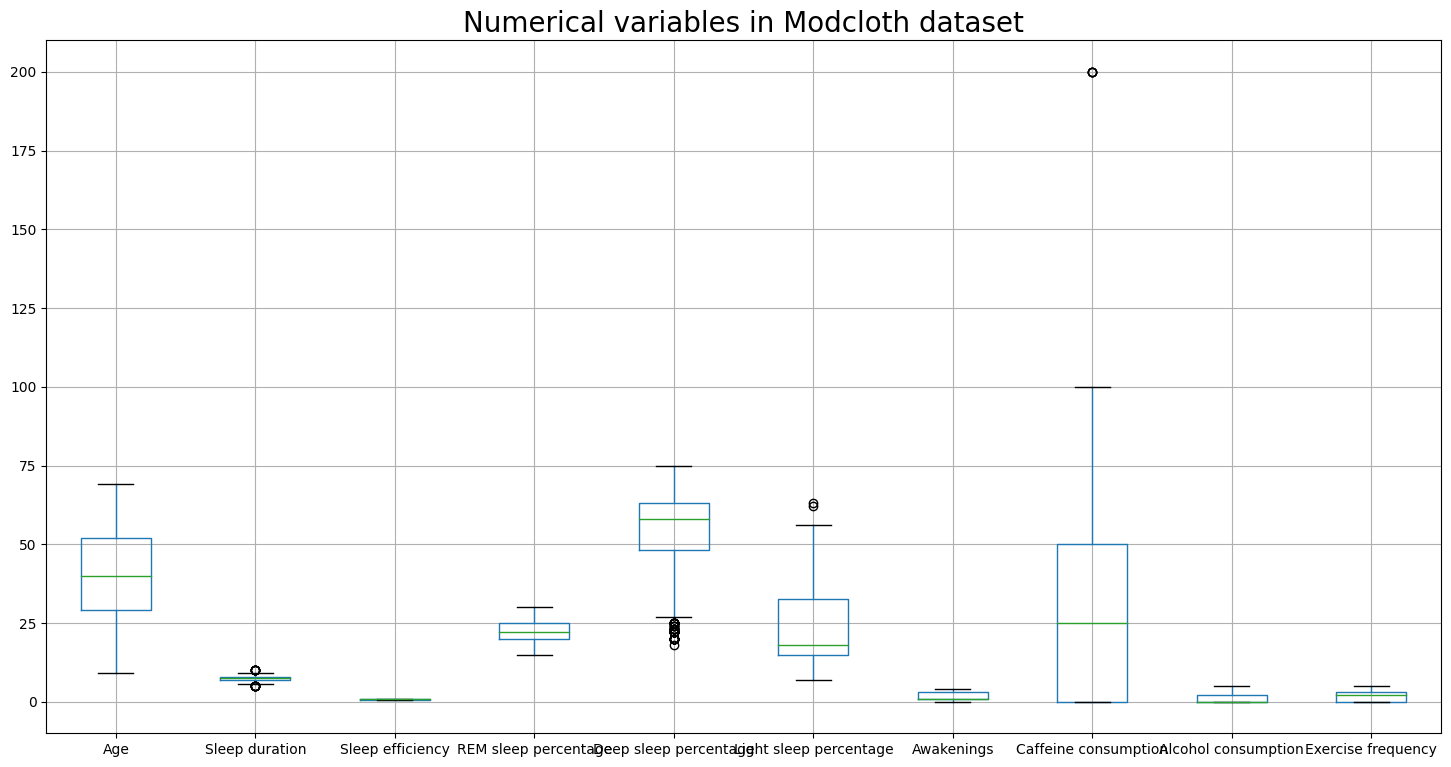

In [ ]:
num_cols = ['Age','Bedtime','Wakeup time','Sleep duration','Sleep efficiency','REM sleep percentage','Deep sleep percentage','Light sleep percentage','Awakenings','Caffeine consumption','Alcohol consumption','Smoking status','Exercise frequency']
plt.figure(figsize=(18,9))
sleepData[num_cols].boxplot()
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show()

Handling Outliers


In [ ]:
sleepData[sleepData['Light sleep percentage'] > 60]

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
17,18,40,Female,2021-08-27 23:00:00,2021-08-27 06:30:00,7.5,0.50,18,20,62,3.0,50.0,2.0,Yes,3.0
257,258,27,Female,2021-05-31 22:00:00,2021-05-31 06:00:00,8.0,0.52,15,22,63,1.0,25.0,5.0,Yes,5.0


In [ ]:
sleepData[sleepData['Caffeine consumption'] == 200]

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
62,63,29,Male,2021-05-03 21:00:00,2021-05-03 05:00:00,8.0,0.81,15,67,18,1.0,200.0,0.0,No,NaN
81,82,29,Male,2021-07-11 21:00:00,2021-07-11 04:30:00,7.5,0.81,15,67,18,2.0,200.0,0.0,No,2.0
96,97,41,Male,2021-02-15 21:00:00,2021-02-15 04:00:00,7.0,0.96,28,55,17,0.0,200.0,0.0,No,3.0
161,162,42,Male,2021-11-06 21:00:00,2021-11-06 04:30:00,7.5,0.95,28,55,17,0.0,200.0,0.0,No,3.0


In [ ]:
sleepData.at[17,'Light sleep percentage'] = None
sleepData.at[257,'Light sleep percentage'] = None
sleepData.at[161,'Caffeine consumption'] = None
sleepData.at[96,'Caffeine consumption'] = None
sleepData.at[81,'Caffeine consumption'] = None
sleepData.at[62,'Caffeine consumption'] = None

Frequency counts of categorical variables

In [ ]:
print("Frequency counts of", "Gender")
print(sleepData["Gender"].value_counts())

Frequency counts of Gender
Male      228
Female    224
Name: Gender, dtype: int64


Histogram of Sleep duration and Bar plot of Gender, Caffeine consumption, Exercise frequency

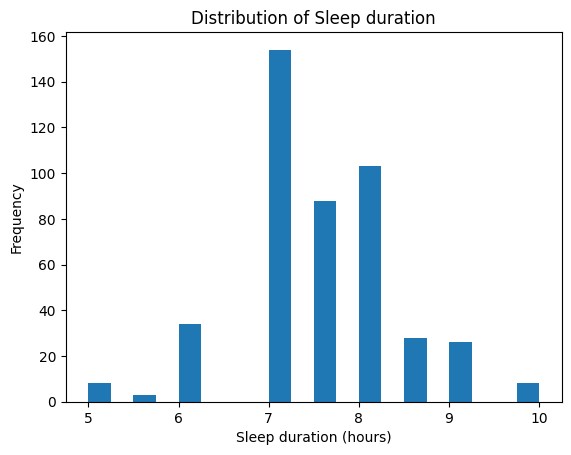

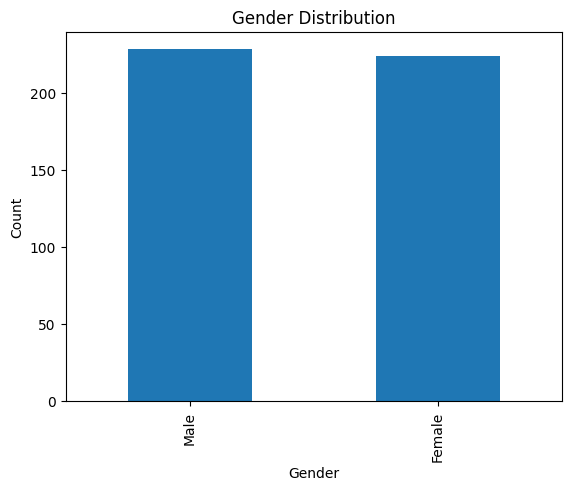

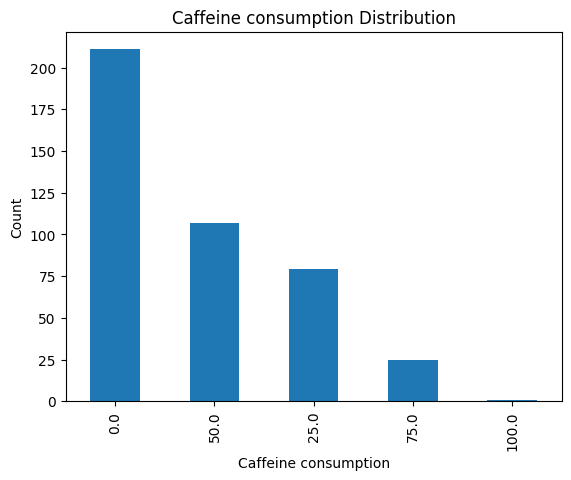

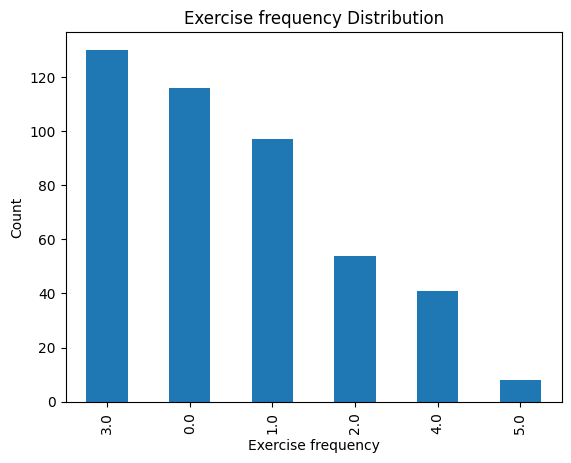

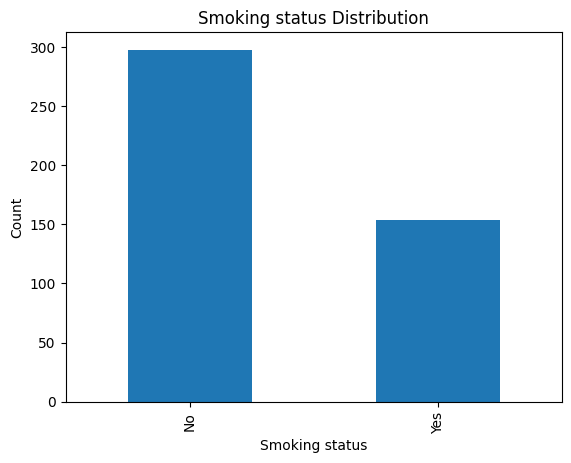

In [ ]:
plt.hist(sleepData["Sleep duration"], bins=20)
plt.xlabel("Sleep duration (hours)")
plt.ylabel("Frequency")
plt.title("Distribution of Sleep duration")
plt.show()


sleepData.Gender.value_counts()
sleepData["Gender"].value_counts().plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

sleepData["Caffeine consumption"].value_counts().plot(kind="bar")
plt.xlabel("Caffeine consumption")
plt.ylabel("Count")
plt.title("Caffeine consumption Distribution")
plt.show()

sleepData["Exercise frequency"].value_counts().plot(kind="bar")
plt.xlabel("Exercise frequency")
plt.ylabel("Count")
plt.title("Exercise frequency Distribution")
plt.show()


sleepData["Smoking status"].value_counts().plot(kind="bar")
plt.xlabel("Smoking status")
plt.ylabel("Count")
plt.title("Smoking status Distribution")
plt.show()

Scatter plot of Sleep duration vs. Sleep efficiency

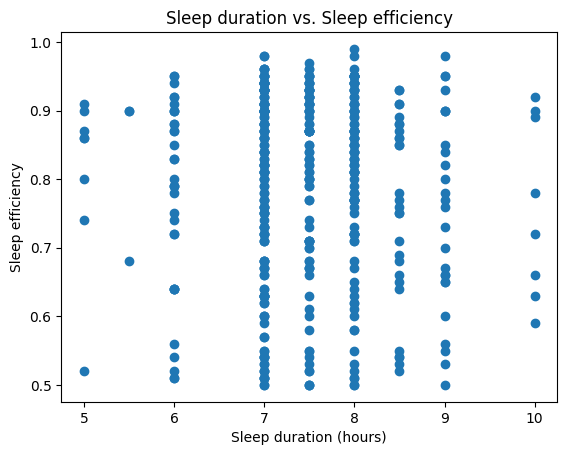

In [ ]:
plt.scatter(sleepData["Sleep duration"], sleepData["Sleep efficiency"])
plt.xlabel("Sleep duration (hours)")
plt.ylabel("Sleep efficiency")
plt.title("Sleep duration vs. Sleep efficiency")
plt.show()

Scatter plot of Sleep duration vs. Gender

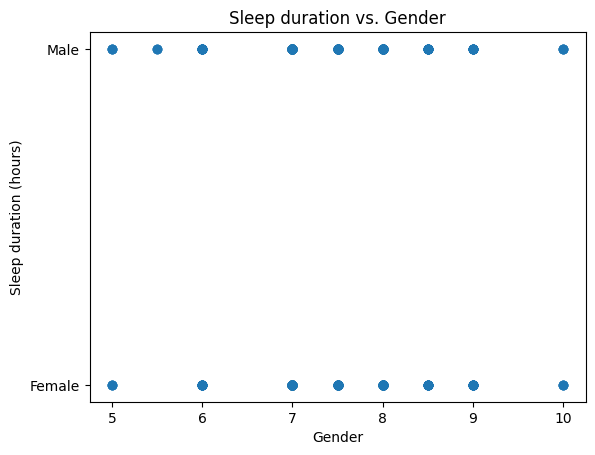

In [ ]:
plt.scatter(sleepData["Sleep duration"], sleepData["Gender"])
plt.xlabel("Gender")
plt.ylabel("Sleep duration (hours)")
plt.title("Sleep duration vs. Gender")
plt.show()

Scatter plot for Female and Male

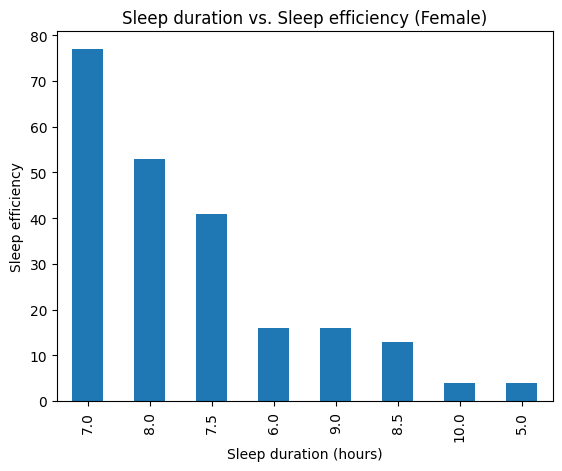

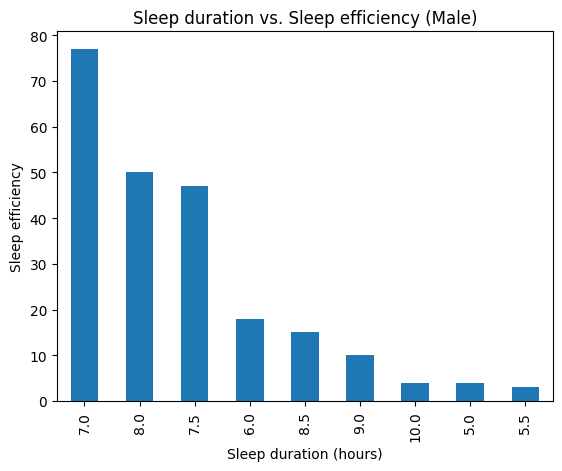

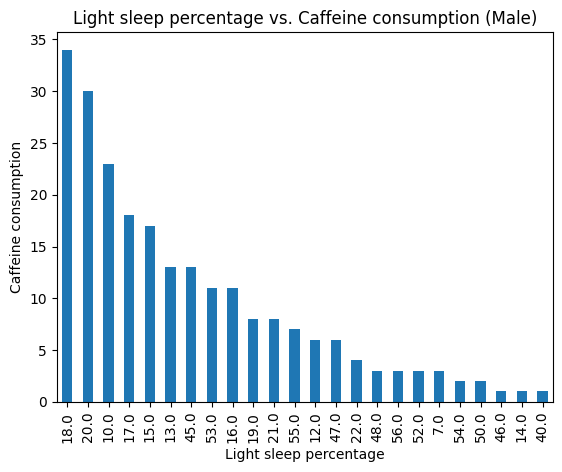

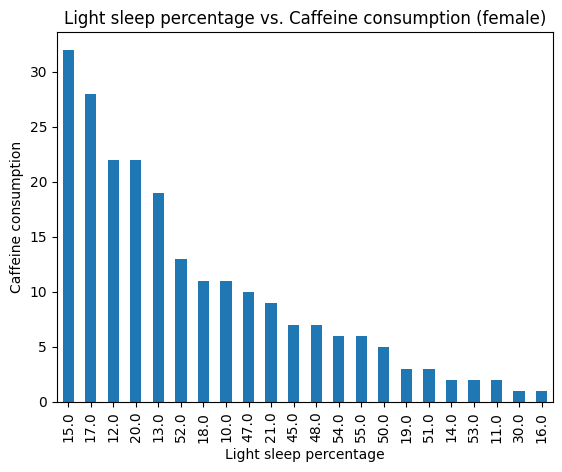

In [ ]:
# Scatter plot for Female
female_data = sleepData[sleepData["Gender"] == "Female"]
female_data["Sleep duration"].value_counts().plot(kind="bar")
plt.xlabel("Sleep duration (hours)")
plt.ylabel("Sleep efficiency")
plt.title("Sleep duration vs. Sleep efficiency (Female)")
plt.show()

# Scatter plot for Male
male_data = sleepData[sleepData["Gender"] == "Male"]
male_data["Sleep duration"].value_counts().plot(kind = "bar")
plt.xlabel("Sleep duration (hours)")
plt.ylabel("Sleep efficiency")
plt.title("Sleep duration vs. Sleep efficiency (Male)")
plt.show()  

# Scatter plot for Male
male_data["Light sleep percentage"].value_counts().plot(kind = "bar")
plt.xlabel("Light sleep percentage")
plt.ylabel("Caffeine consumption")
plt.title("Light sleep percentage vs. Caffeine consumption (Male)")
plt.show() 

# Scatter plot for Female
female_data["Light sleep percentage"].value_counts().plot(kind = "bar")
plt.xlabel("Light sleep percentage")
plt.ylabel("Caffeine consumption")
plt.title("Light sleep percentage vs. Caffeine consumption (female)")
plt.show() 


How smoking affects the quality of sleep in men and women

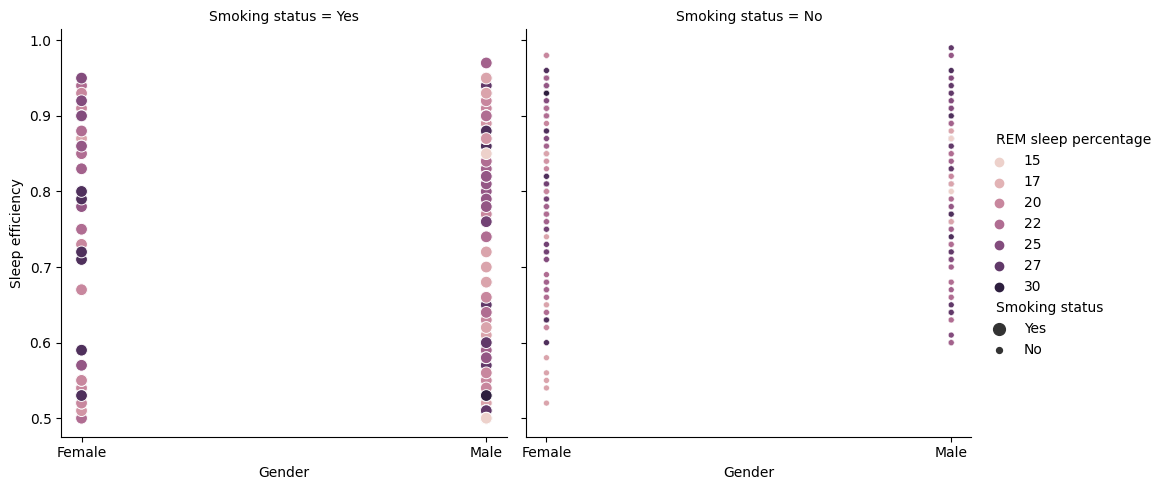

In [ ]:
sns.relplot(
    data=sleepData,
    x="Gender", y="Sleep efficiency", col="Smoking status",
    hue="REM sleep percentage", size="Smoking status",
)
plt.show()

the relationship between age and sleep efficiency

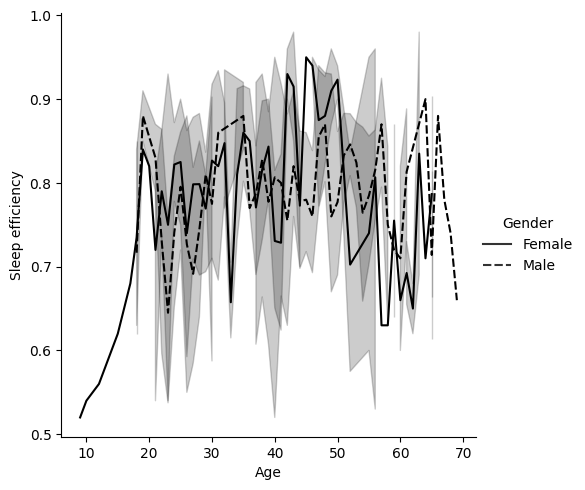

In [ ]:
sns.relplot(
    data=sleepData, kind="line",
    x="Age", y="Sleep efficiency", style="Gender", color="black"
)
plt.show()

Does smoking affect Sleep efficiency ?

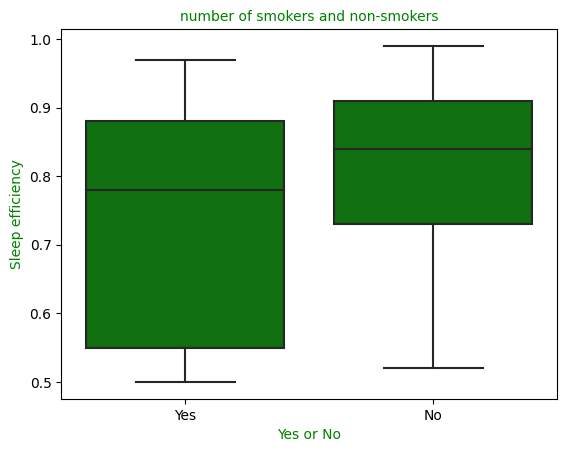

In [ ]:
sns.boxplot(data=sleepData,x="Smoking status",y="Sleep efficiency", color="green")
plt.xlabel("Yes or No", color="green",fontsize=10)
plt.ylabel("Sleep efficiency", color="green",fontsize=10)
plt.title("number of smokers and non-smokers", color="green",fontsize=10)
plt.show()


Does alcohol affect Sleep efficiency ?

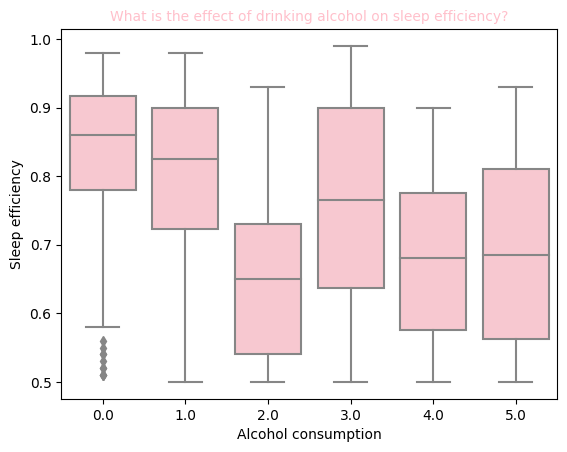

In [ ]:
sns.boxplot(data=sleepData,x="Alcohol consumption",y="Sleep efficiency", color="pink")
plt.title("What is the effect of drinking alcohol on sleep efficiency?", color="pink",fontsize=10)
plt.show()

Downloading data after EDA

In [ ]:
sleepData.to_csv('Sleep efficiency after EDA.csv', index=False,encoding='utf-8-sig')
files.download('Sleep efficiency after EDA.csv')